# **Retail Sales Data ETL and Visualisation**

## Objectives
Perform ETL (Extract, Transform, Load) on the retail sales dataset, clean and prepare the data for analysis, and generate initial visualisations to explore trends and patterns.

## Inputs
- `stores_data.csv`: Store ID, Type, Size
- `features_data.csv`: Store, Date, Temperature, Fuel Price, Markdowns, CPI, Unemployment, IsHoliday
- `sales_data.csv`: Store, Dept, Date, Weekly Sales, IsHoliday


## Outputs
- Cleaned DataFrames ready for analysis
- Initial visualisations (line plots, bar charts, etc.)

## Data Overview

**Stores Data (sample):**

| Store | Type | Size   |
|-------|------|--------|
| 1     | A    | 151315 |
| 2     | A    | 202307 |
| 3     | B    | 37392  |
| 4     | A    | 205863 |
| 5     | B    | 34875  |

**Features Data (sample):**

| Store | Date       | Temperature | Fuel_Price | MarkDown1 | ... | CPI        | Unemployment | IsHoliday |
|-------|------------|-------------|------------|-----------|-----|------------|--------------|-----------|
| 1     | 05/02/2010 | 42.31       | 2.572      | NaN       | ... | 211.096358 | 8.106        | False     |
| 1     | 12/02/2010 | 38.51       | 2.548      | NaN       | ... | 211.242170 | 8.106        | True      |

**Sales Data (sample):**

| Store | Dept | Date       | Weekly_Sales | IsHoliday |
|-------|------|------------|--------------|-----------|
| 1     | 1    | 05/02/2010 | 24924.50     | False     |
| 1     | 1    | 12/02/2010 | 46039.49     | True      |


## Additional Comments
- This notebook is the foundation for further analysis and dashboard development.
- All code is designed to be reproducible and well-documented.
## Activities Per Role - Day 1

### Project Management
- Ideation session to brainstorm and select the final project idea.
- Created a GitHub repository and set up a project board (GitHub Projects/Trello).
- Defined user stories and assigned tasks.
- Monitored deliverable progress and resolved roadblocks.

### ETL (Extract, Transform, Load)
- Extracted data from the provided datasets.
- Cleaned and transformed data to ensure quality and consistency.
- Loaded data into DataFrames for analysis.

### Data Visualisation
- Explored and understood the data structure.
- Created initial visualisations using Matplotlib and Seaborn.
- Developed basic charts and graphs to visualise key metrics.



---

# Change working directory

In [25]:
# Change working directory to the project root if running from a subfolder
import os

current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory:", os.getcwd())
current_dir = os.getcwd()
current_dir
data_dir = r'C:\Users\midas\Documents\2505-WMCA-Data-Git101\project-one\project_one2025\data'
print(os.listdir(data_dir))

You set a new current directory: c:\Users\midas\Documents\2505-WMCA-Data-Git101\project-one
['features_data.csv', 'features_data_cleaned.csv', 'sales_data.csv', 'sales_data_cleaned.csv', 'stores_data.csv', 'stores_data_cleaned.csv']


Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Section 1: Data Extraction and Initial Inspection


In [27]:
data_dir = r'C:\Users\midas\Documents\2505-WMCA-Data-Git101\project-one\project_one2025\data'
stores = pd.read_csv(f'{data_dir}\\stores_data.csv')
features = pd.read_csv(f'{data_dir}\\features_data.csv')
sales = pd.read_csv(f'{data_dir}\\sales_data.csv')
"""
stores = pd.read_csv(os.path.join(data_dir, 'stores_data.csv'))
features = pd.read_csv(os.path.join(data_dir, 'features_data.csv'))
sales = pd.read_csv(os.path.join(data_dir, 'sales_data.csv'))
"""

"\nstores = pd.read_csv(os.path.join(data_dir, 'stores_data.csv'))\nfeatures = pd.read_csv(os.path.join(data_dir, 'features_data.csv'))\nsales = pd.read_csv(os.path.join(data_dir, 'sales_data.csv'))\n"

Priview the Data with their Titles

In [8]:
# Import display and Markdown functions to show formatted headings and tables in a Jupyter notebook
from IPython.display import display, Markdown

# Display a heading and preview the first five rows of the stores DataFrame
display(Markdown("### Stores Data"))
display(stores.head())

# Display a heading and preview the first five rows of the features DataFrame
display(Markdown("### Features Data"))
display(features.head())

# Display a heading and preview the first five rows of the sales DataFrame
display(Markdown("### Sales Data"))
display(sales.head())

### Stores Data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Features Data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Sales Data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory
Confirm the new current directory

In [9]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\midas\\Documents\\2505-WMCA-Data-Git101\\project-one\\project_one2025\\jupyter_notebooks'

## Section 2: Data Cleaning and Transformation

In [28]:
print("\nSales Data Info:")
print(sales.info())
print("\nMissing values in Sales Data:")
print(sales.isnull().sum())




Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Missing values in Sales Data:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [29]:

print("\nFeatures Data Info:")
print(features.info())
print("\nMissing values in Features Data:")
print(features.isnull().sum())


Features Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Missing values in Features Data:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4  

In [30]:
print("Stores Data Info:")
print(stores.info())
print("\nMissing values in Stores Data:")
print(stores.isnull().sum())

Stores Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None

Missing values in Stores Data:
Store    0
Type     0
Size     0
dtype: int64


I want to see any missing values in the dataframe

In [31]:
# Check missing values for each DataFrame
print("Stores missing values:\n", stores.isnull().sum())
print("\nFeatures missing values:\n", features.isnull().sum())
print("\nSales missing values:\n", sales.isnull().sum())

Stores missing values:
 Store    0
Type     0
Size     0
dtype: int64

Features missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Transform: Clean Data

In [32]:
# Check for missing values
print("Stores missing values:\n", stores.isnull().sum())
print("\nFeatures missing values:\n", features.isnull().sum())
print("\nSales missing values:\n", sales.isnull().sum())

# Fill missing values with 0 for simplicity (customise as needed)
stores = stores.fillna(0)
features = features.fillna(0)
sales = sales.fillna(0)

# Convert date columns to datetime
if 'Date' in features.columns:
    features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)
if 'Date' in sales.columns:
    sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

Stores missing values:
 Store    0
Type     0
Size     0
dtype: int64

Features missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Cleaned datasets

In [16]:

stores.to_csv(f'{data_dir}\\stores_data_cleaned.csv', index=False)
features.to_csv(f'{data_dir}\\features_data_cleaned.csv', index=False)
sales.to_csv(f'{data_dir}\\sales_data_cleaned.csv', index=False)

## Section 3: Basic Visualisations

 # Descriptive Statistics

In [17]:
print("Average sales per store:")
print(sales.groupby('Store')['Weekly_Sales'].mean())


Average sales per store:
Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64


In [18]:
print("\nAverage sales per department:")
print(sales.groupby('Dept')['Weekly_Sales'].mean())


Average sales per department:
Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64


## Conclusions and Next Steps

- The data is now cleaned and ready for advanced analysis.
- Next steps: Develop advanced visualisations and prepare the final presentation.

Average sales per store:
Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

Average sales per department:
Dept
1    19213.485088
2    43607.020113
3    11793.698516
4    25974.630238
5    21365.583515
Name: Weekly_Sales, dtype: float64


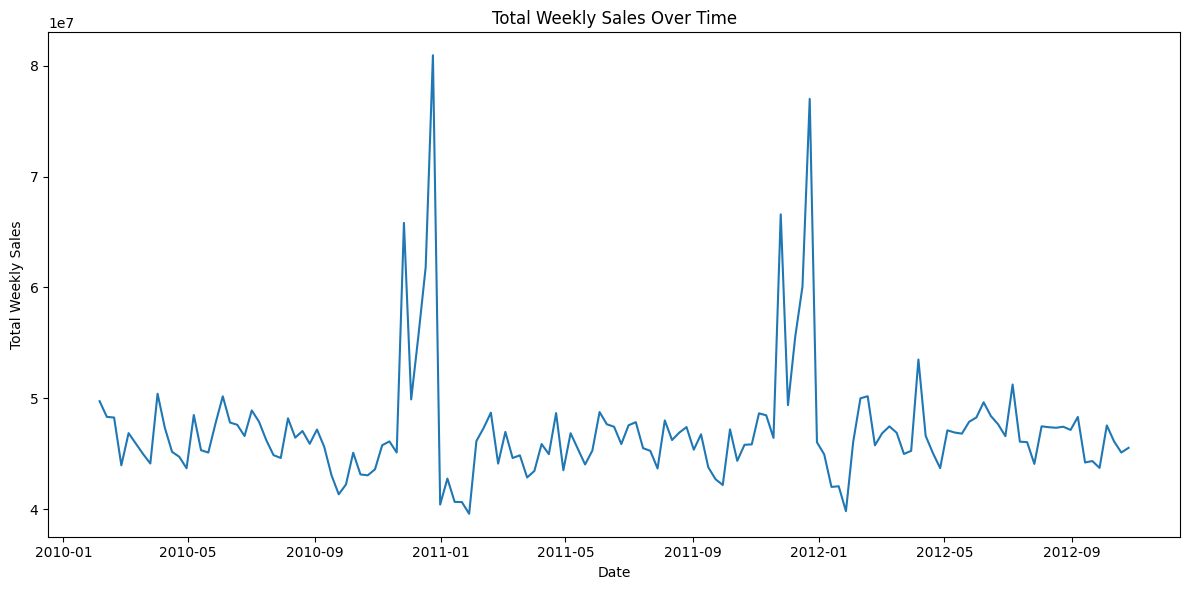

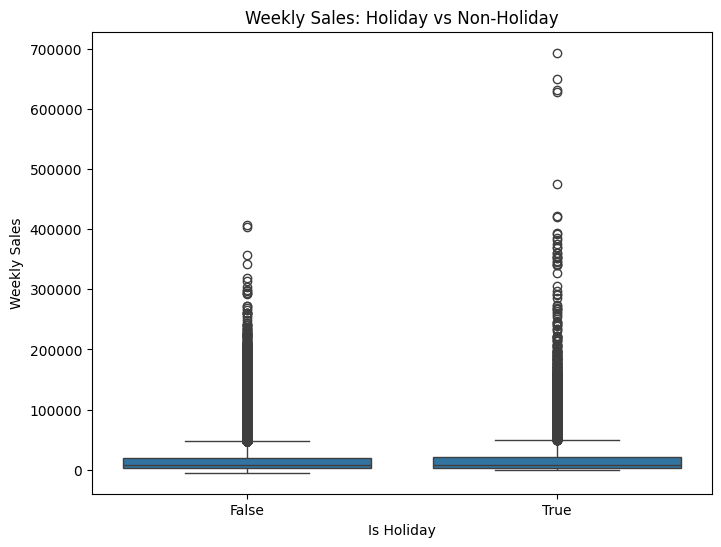

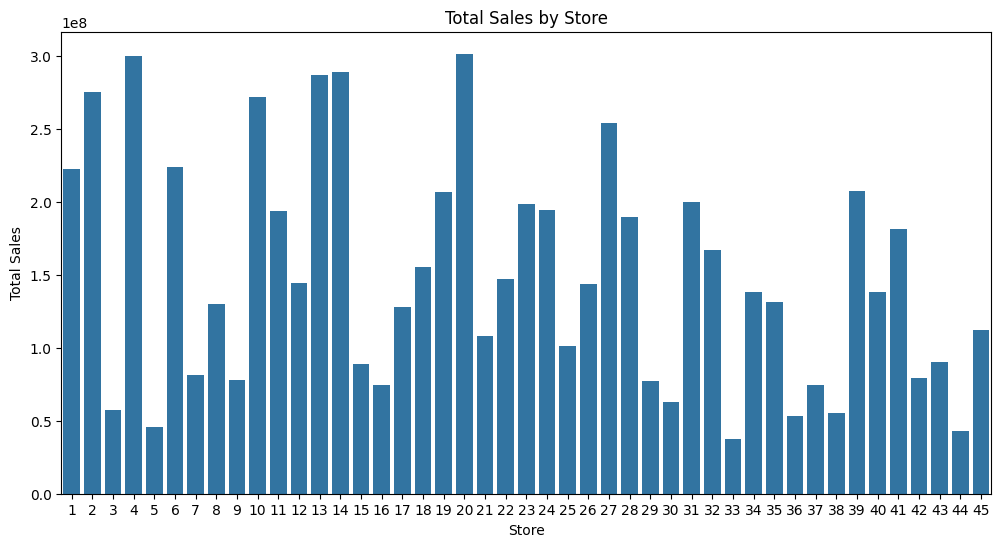

In [37]:
# Install missing packages if needed
#%pip install matplotlib seaborn

#import matplotlib.pyplot as plt
#import seaborn as sns

# --- ETL Pipeline ---

# DataFrames 'stores', 'features', and 'sales' are already loaded and cleaned in previous cells.

# Create a new feature: sales difference between holiday and non-holiday weeks (example)
sales['IsHoliday'] = sales['IsHoliday'].astype(bool)
holiday_sales = sales[sales['IsHoliday']].groupby('Store')['Weekly_Sales'].mean()
nonholiday_sales = sales[~sales['IsHoliday']].groupby('Store')['Weekly_Sales'].mean()
sales_diff = (holiday_sales - nonholiday_sales).reset_index().rename(columns={0: 'Sales_Diff'})

# --- Data Visualisation ---

# Descriptive Statistics: Average sales per store and department
print("Average sales per store:")
print(sales.groupby('Store')['Weekly_Sales'].mean().head())

print("\nAverage sales per department:")
print(sales.groupby('Dept')['Weekly_Sales'].mean().head())

# Trend Analysis: Plot sales trends over time
sales_by_date = sales.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()

# Impact Analysis: Sales during holidays vs non-holidays
plt.figure(figsize=(8,6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=sales)
plt.title('Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

# Comparative Analysis: Sales by Store
store_sales = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

Sales Over Time

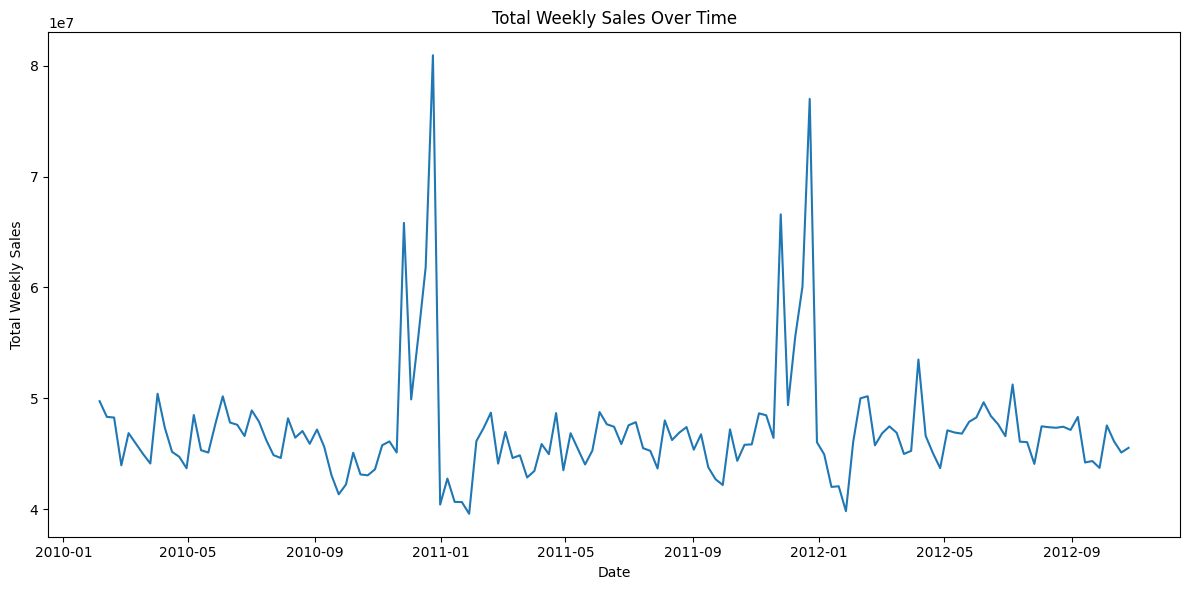

In [38]:
import matplotlib.pyplot as plt

sales_by_date = sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()

During Holidays vs Non-Holidays

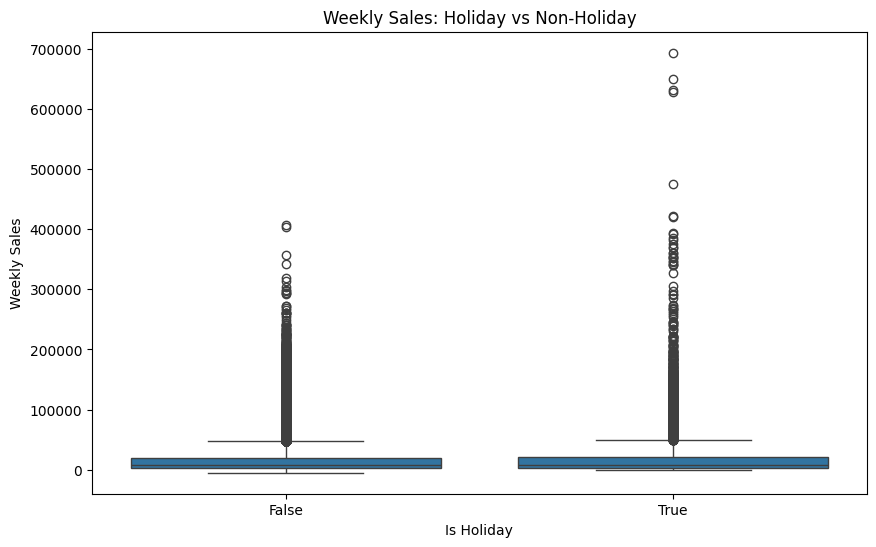

In [20]:
import seaborn as sns

# Merge sales and features on Store, Date, and IsHoliday
merged = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')

plt.figure(figsize=(10,6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=merged)
plt.title('Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

Correlation Heatmap (Seaborn)

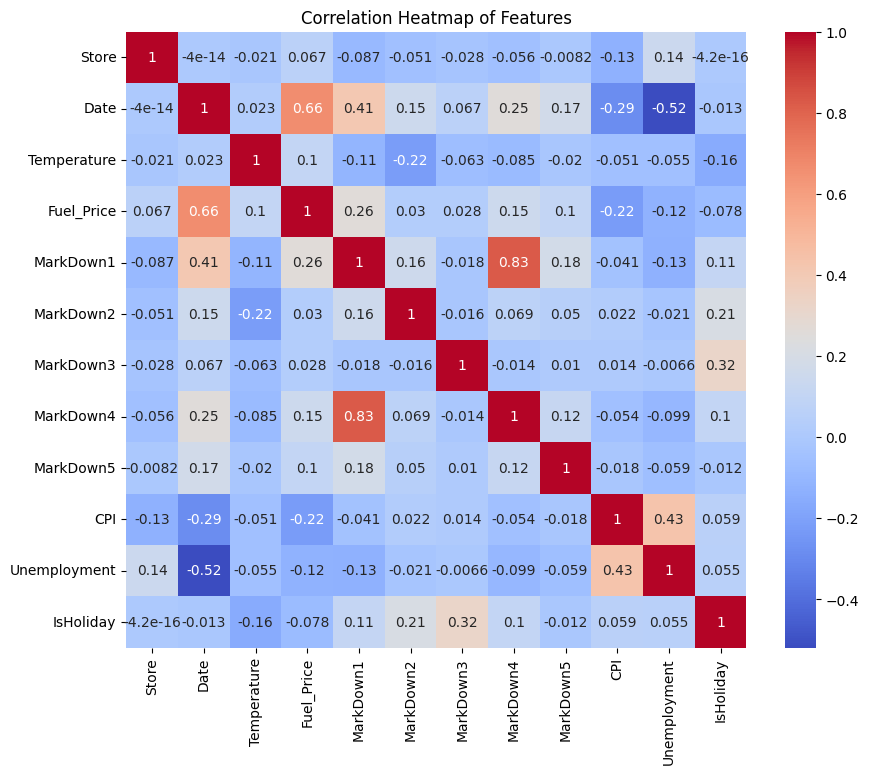

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Correlation heatmap for features data
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

Pair Plot

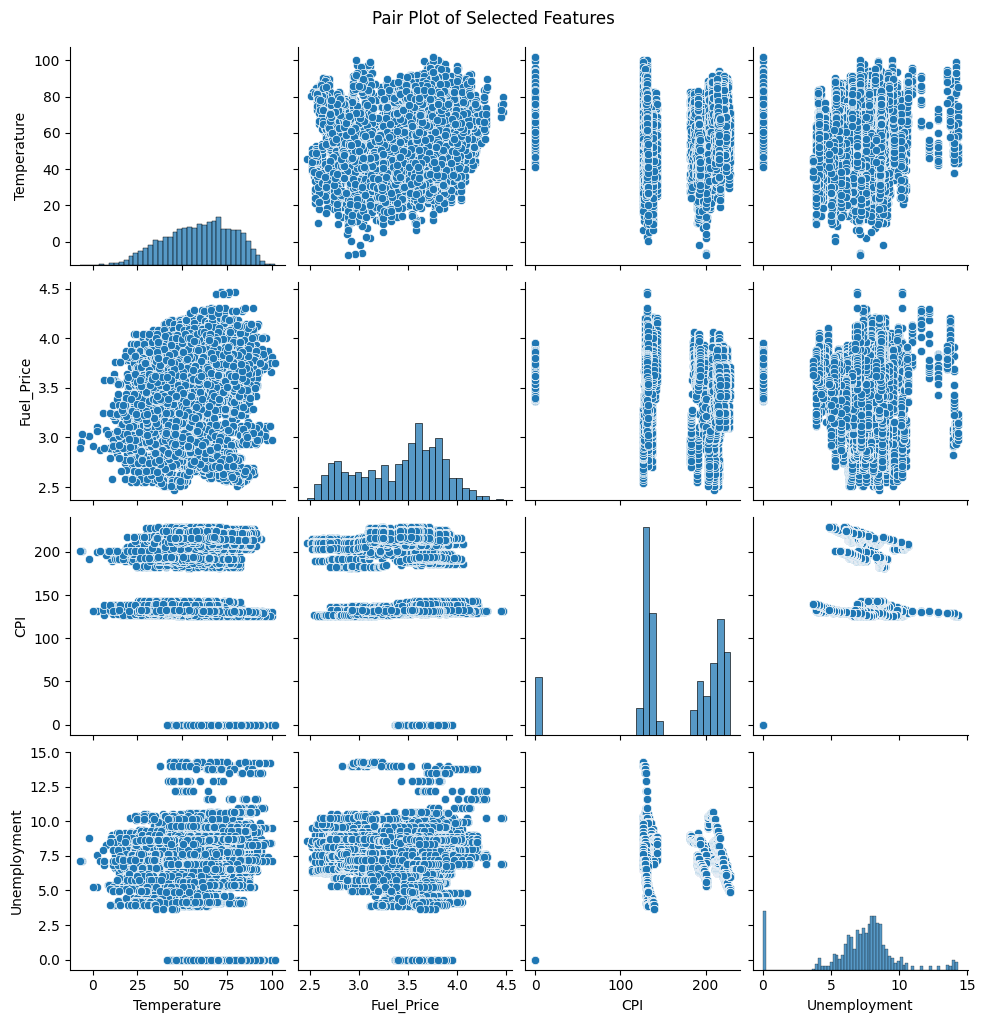

In [22]:
# Select a subset of columns for pairplot
subset = features[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
sns.pairplot(subset)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

Violin Plot: Sales Distribution by Store Type (Seaborn)

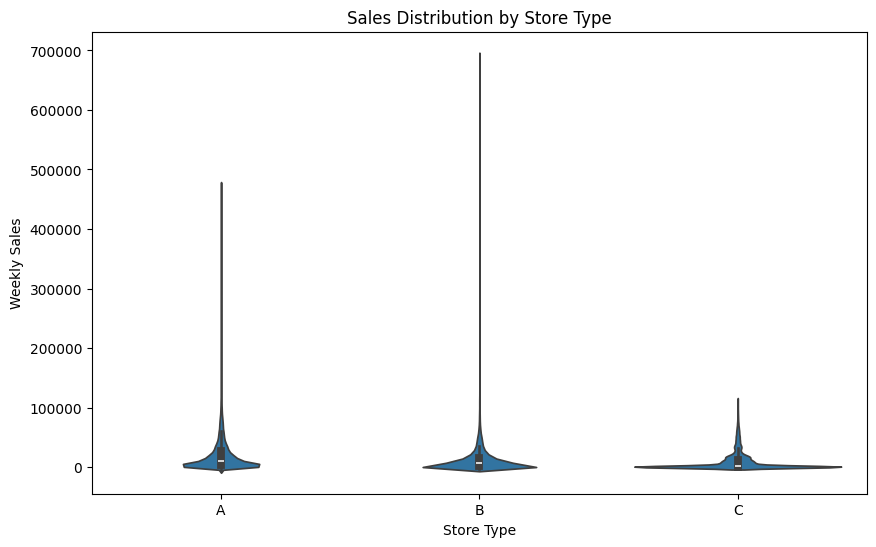

In [23]:
# Merge sales and stores to get store type
merged = pd.merge(sales, stores, on='Store', how='left')
plt.figure(figsize=(10,6))
sns.violinplot(x='Type', y='Weekly_Sales', data=merged)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

Interactive Sales Trend (Plotly)

In [22]:
#%pip install nbformat

import plotly.express as px

fig = px.line(sales_by_date, x='Date', y='Weekly_Sales', title='Interactive Total Weekly Sales Over Time')
fig.show()

 Interactive Store Sales Map (Plotly)

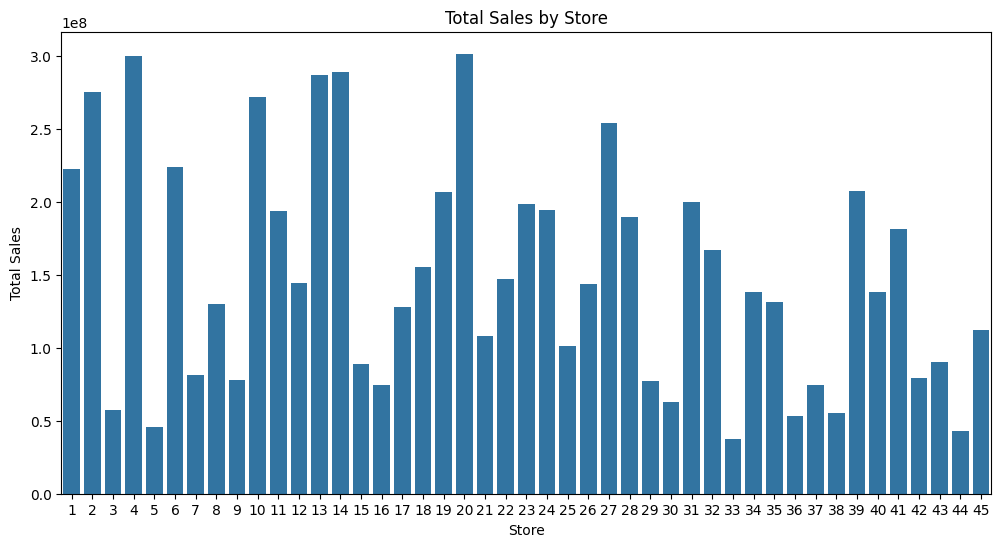

In [25]:
store_sales = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


# 1. Introduction

Welcome to my individual formative assignment on **Python ETL and Data Visualisation**.  
This project aims to enhance my skills in data extraction, transformation, loading (ETL), and data visualisation using Python tools such as Matplotlib, Seaborn, and Plotly.

**Project Context:**  
The dataset used is a retail sales dataset from Kaggle, containing historical sales data for 45 stores across different regions. The data includes store types, sizes, and promotional markdowns, providing an opportunity to analyse trends, the impact of promotions, and sales performance across stores.

**Project Goals:**
- Design and implement an ETL pipeline using Python.
- Clean and transform the data for analysis.
- Visualise data to uncover trends and insights.
- Document the process and outcomes for future maintainability.

**Key Activities:**
- Data Extraction, Transformation, and Loading (ETL)
- Data Visualisation
- Agile Project Management and Documentation

**Data Source:**  
[Retail Sales Dataset on Kaggle](https://www.kaggle.com/datasets/manjeetsingh/retaildataset)



---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [25]:
import os
try:
    # Example: create a folder named 'output' in the current directory
    os.makedirs(os.path.join(current_dir, 'output'), exist_ok=True)
except Exception as e:
    print(e)
